In [1]:
import numpy as np 
import emcee
import corner
import h5py
from sunpy.coordinates.sun import carrington_rotation_time
import astropy.units as u
import os
from mycolorpy import colorlist as mcp
import scipy

In [2]:
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'serif',
        'size'   : 15}

matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 

In [3]:
CR_list = [2048, 2049, 2050, 2052, 2053, 2054, 2055, 2056, 2057, 2058]
CR_color_list = np.array(mcp.gen_color(cmap="tab10", n=len(CR_list)))

In [4]:
samples_hist = []

In [5]:
for cr in CR_list:
    # read in mcmc file
    reader = emcee.backends.HDFBackend("MCMC_results/MCMC_CR" + str(cr) + ".h5")
    # burn-in disgregard 
    nburnin = 1000
    # read in samples
    samples_flatten = reader.get_chain(flat=True, discard=nburnin)
    samples_hist.append(samples_flatten)

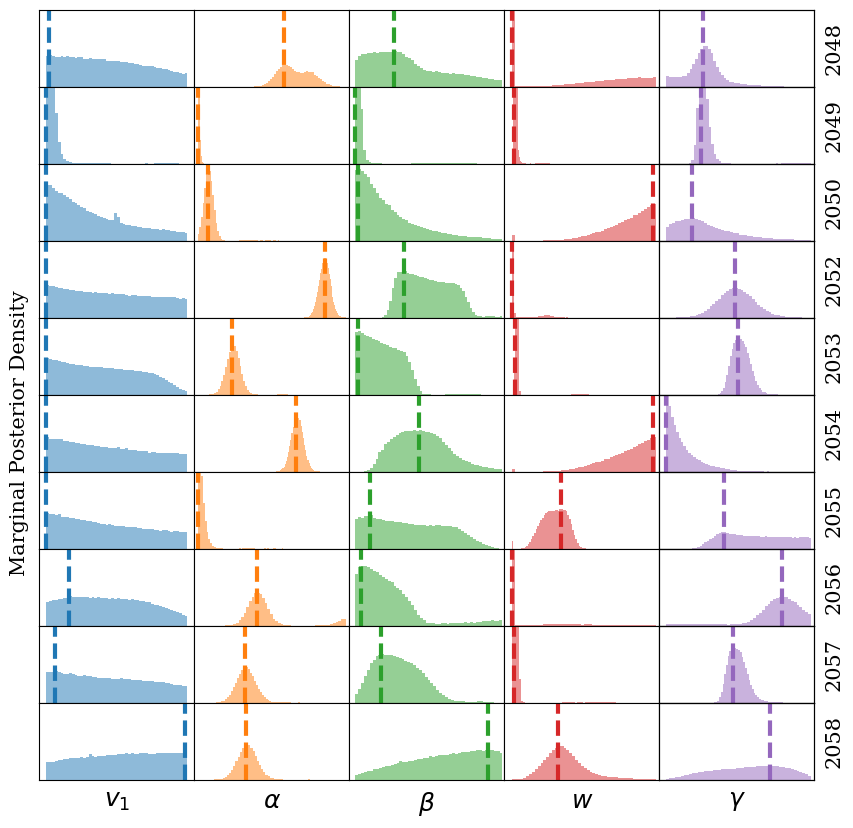

In [6]:
fig, ax = plt.subplots(nrows=10, ncols=5, figsize=(10, 10))
for ii in range(10):
    for jj in range(5):
        n, bins, _ = ax[ii, jj].hist(samples_hist[ii][:, jj], 50, density=True, 
                                     color=CR_color_list[jj], linewidth=3, 
                                     alpha=0.5, label="CR" + str(CR_list[jj]))
        
        ax[ii, jj].axvline(bins[np.where(n == n.max())], color=CR_color_list[jj], ls="--", linewidth=3)
    
        if jj==0:
            ax[ii, jj].set_xlim(530, 970)
            ax[ii, jj].set_ylim(0, 0.008)
        
        elif jj==1:
            ax[ii, jj].set_xlim(0.04, 0.51)
            ax[ii, jj].set_ylim(0, 30)
        
        elif jj==2:
            ax[ii, jj].set_xlim(0.97, 1.76)
            ax[ii, jj].set_ylim(0, 5)
        
        elif jj==3:
            ax[ii, jj].set_xlim(-0.01, 0.41)
            ax[ii, jj].set_ylim(0, 20)
        
        elif jj==4:
            ax[ii, jj].set_xlim(0.02, 0.92)
            ax[ii, jj].set_ylim(0, 10)
            
for kk in range(0, 5):
    for pp in range(0, 10):
        ax[pp, kk].set_yticks([])
        ax[pp, kk].set_xticks([])
        
ax[5, 0].set_ylabel("Marginal Posterior Density")
ax[-1, 0].set_xlabel(r"$v_{1}$", fontsize=18)
ax[-1, 1].set_xlabel(r"$\alpha$", fontsize=18)
ax[-1, 2].set_xlabel(r"$\beta$", fontsize=18)
ax[-1, 3].set_xlabel(r"$w$", fontsize=18)
ax[-1, 4].set_xlabel(r"$\gamma$", fontsize=18)
    
for jj in range(10):
    ax2 = ax[jj, -1].twinx() 
    ax2.set_ylabel(str(CR_list[jj]))
    ax2.set_yticks([])
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figs/MCMC/posterior_evolution.png", dpi=600)

In [22]:
samples_hist = []

In [23]:
for cr in CR_list:
    # read in mcmc file
    reader = emcee.backends.HDFBackend("MCMC_results/MCMC_CR" + str(cr) + "_T_100.h5")
    # burn-in disgregard 
    nburnin = 500
    # read in samples
    samples_flatten = reader.get_chain(flat=True, discard=nburnin)
    samples_hist.append(samples_flatten)

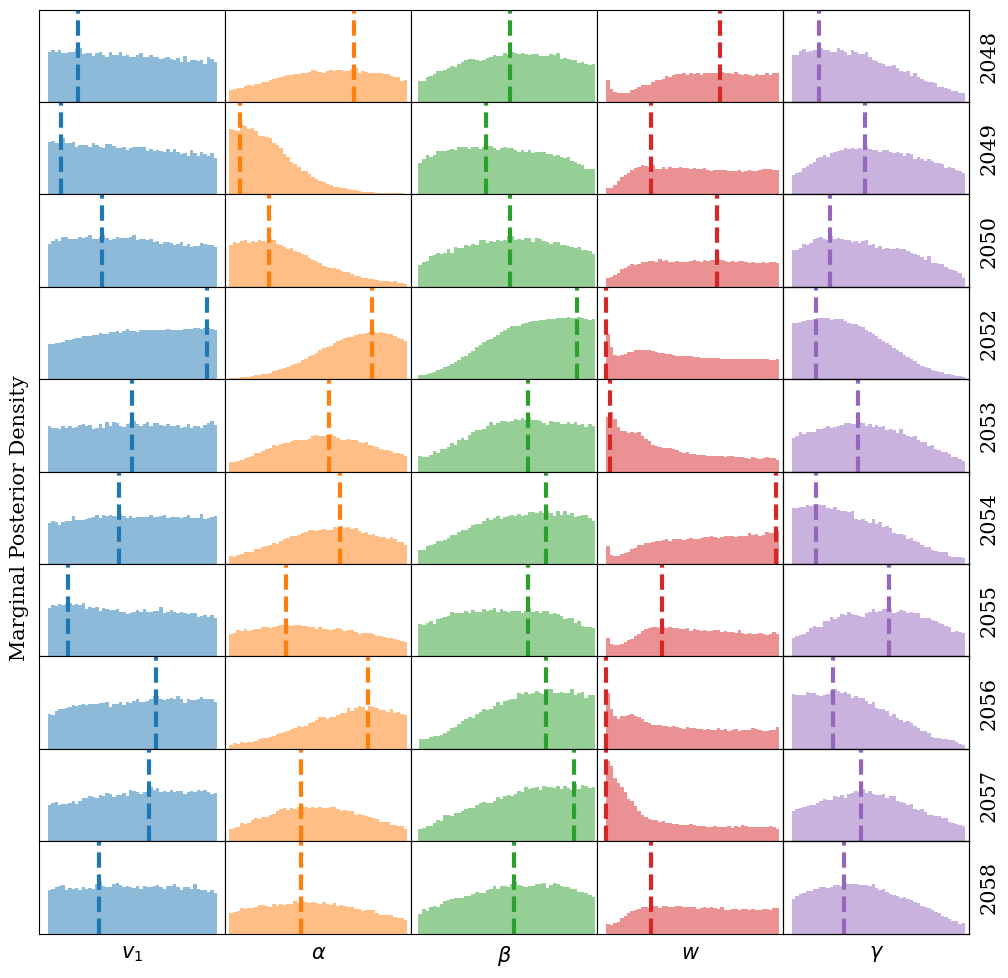

In [24]:
fig, ax = plt.subplots(nrows=10, ncols=5, figsize=(12, 12))
for ii in range(10):
    for jj in range(5):
        n, bins, _ = ax[ii, jj].hist(samples_hist[ii][:, jj], 50, density=True, 
                                     color=CR_color_list[jj], linewidth=3, 
                                     alpha=0.5, label="CR" + str(CR_list[jj]))
        
        ax[ii, jj].axvline(bins[np.where(n == n.max())], color=CR_color_list[jj], ls="--", linewidth=3)
    
        if jj==0:
            ax[ii, jj].set_xlim(530, 970)
            ax[ii, jj].set_ylim(0, 0.005)
        
        elif jj==1:
            ax[ii, jj].set_xlim(0.04, 0.51)
            ax[ii, jj].set_ylim(0, 8)
        
        elif jj==2:
            ax[ii, jj].set_xlim(0.97, 1.76)
            ax[ii, jj].set_ylim(0, 3)
        
        elif jj==3:
            ax[ii, jj].set_xlim(-0.01, 0.41)
            ax[ii, jj].set_ylim(0, 10)
        
        elif jj==4:
            ax[ii, jj].set_xlim(0.02, 0.92)
            ax[ii, jj].set_ylim(0, 3)
            
for kk in range(0, 5):
    for pp in range(0, 10):
        ax[pp, kk].set_yticks([])
        ax[pp, kk].set_xticks([])
        
ax[5,  0].set_ylabel("Marginal Posterior Density")
ax[-1, 0].set_xlabel(r"$v_{1}$")
ax[-1, 1].set_xlabel(r"$\alpha$")
ax[-1, 2].set_xlabel(r"$\beta$")
ax[-1, 3].set_xlabel(r"$w$")
ax[-1, 4].set_xlabel(r"$\gamma$")
    
for jj in range(10):
    ax2 = ax[jj, -1].twinx() 
    ax2.set_ylabel(str(CR_list[jj]))
    ax2.set_yticks([])
    
fig.subplots_adjust(wspace=0, hspace=0)
plt.savefig("figs/MCMC/posterior_evolution_tempered.png", dpi=600)